## PS1 star/galaxy and distance analysis
First import matplotlib and numpy

In [1]:
import mysql.connector
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Connect to database (ask for the settings). 

Then run the query on 
  * sgscore1 (star/galaxy parameter for nearest PS1 source, and 
  * distpsnr1 (distance of nearest PS1 source)
  
Query excludes the value sgscore1=0.5, meaning NaN

And we use the standard criterion for "good" candidates.

In [2]:
import settings
msl = mysql.connector.connect(\
            user    =settings.DB_USER, \
            password=settings.DB_PASS, \
            host    =settings.DB_HOST, \
            database='ztf')
cursor = msl.cursor(buffered=True, dictionary=True)
query = 'SELECT sgscore1,distpsnr1 from candidates where '
query += 'sgscore1 > 0.0 and sgscore1 <> 0.5 '
query += 'and rb >= 0.65 and nbad = 0 and fwhm <= 5 and elong <= 1.2 and abs(magdiff) <= 0.1'
cursor.execute(query)
n = cursor.rowcount
print ('found %d candidates' % n)

found 1973432 candidates


Maybe there is a more direct way to do this ....

In [3]:
sglist = []
distlist = []
i = 0
for row in cursor:
    sglist.append(row['sgscore1'])
    distlist.append(row['distpsnr1'])
cursor.close()

True

Make a histogram of sgscore1

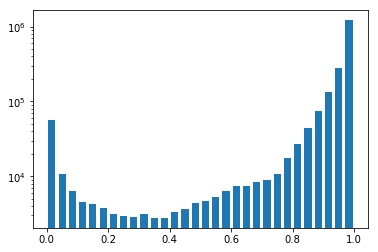

In [4]:
hist, bins = np.histogram(sglist, bins=30)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.yscale('log')
plt.show()

Make a scatter plot of sgscore1 (horizontal), and distpsnr1 (vertical)

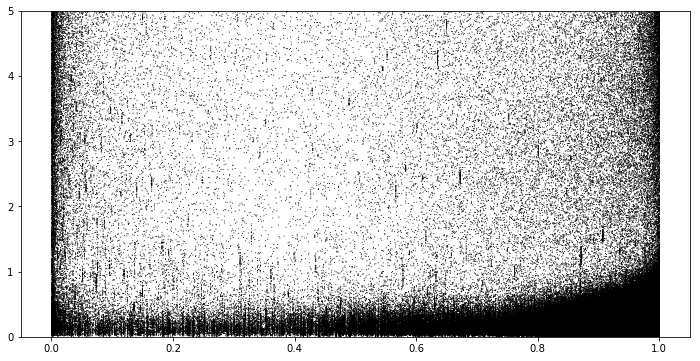

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(sglist, distlist, c=(0,0,0), s=1, edgecolor='')
plt.ylim((0.0, 5.0))
plt.show()